# List 5

In [28]:
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

## Exercício 1

Considerar o problema de interpolação com polinômios de grau 𝑛 = 2, que passam por 𝑛+1 = 3 pontos {(𝑥0, 𝑦0), (𝑥1, 𝑦1), (𝑥2, 𝑦2)}, usando as funções 𝜙𝑖(𝑥), 𝑖 = 0, 1, 2: 

$$\begin{cases}\phi_0(x) = \frac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)}\\
               \phi_1(x) = \frac{(x-x_0)(x-x_2)}{(x_1-x_0)(x_1-x_2)}\\
               \phi_2(x) = \frac{(x-x_0)(x-x_1)}{(x_2-x_0)(x_2-x_1)}
\end{cases}$$

Encontrar os coeficientes do polinômio: 

$$p(x) = \sum²_{i=0}c_1 \phi_i (x)$$

E dar a solução do mesmo. Qual seria a vantagem de usar este tipo de base de funções (polinômios de Lagrange) para o espaço dos polinômios.


In [32]:
def CalcPhi(x, listX):
    phi_0 = ((x-listX[1])*(x-listX[2]))/((listX[0]-listX[1])*(listX[0]-listX[2]))
    phi_1 = ((x-listX[0])*(x-listX[2]))/((listX[1]-listX[0])*(listX[1]-listX[2]))
    phi_2 = ((x-listX[0])*(x-listX[1]))/((listX[2]-listX[0])*(listX[2]-listX[1]))

    return phi_0, phi_1, phi_2

In [33]:
def Interpol_1(x, y):
    x0 = CalcPhi(x[0], x)
    x1 = CalcPhi(x[1], x)
    x2 = CalcPhi(x[2], x)

    A = np.matrix([[x0[0], x0[1], x0[2]], [x1[0], x1[1], x1[2]], [x2[0], x2[1], x2[2]]])
    C = np.linalg.solve(A, y)

    return C

In [34]:
def Solution(x, listPhi, C, size):
     
    v = 0

    for i in range(size):
        v += C[i]*listPhi[i]

    return v

In [35]:
# CALCULO DOS COEFICIENTES

pontosX = [2, 6, 4]         # x0, x1, x2
pontosY = [14, 24, 25]      # y0, y1, y2

C = Interpol_1(pontosX, pontosY)
print(C)

[14. 24. 25.]


In [36]:
# ENCONTRANDO SOLUÇÃO

x = 2                   # Número qualquer
size = len(pontosX)     # Não especificado

listPhi = CalcPhi(x, pontosX)
V = Solution(x, listPhi, C, size)
print(V)

14.0


## Exercício 2

Modificar o exemplo fornecido e calcular o polinomio cúbico por partes para a função de Runge 𝑅(𝑥). Considerar outros conjuntos de pontos, inclusive conjuntos que não estejam uniformemente distribuídos no intervalo de interesse.

In [61]:
def R(x):
    return 1.0/(1.0 + 25.0*x**2)

def CalculateAndPlot(boundarie, pointsX, pointsY, type):
    # Define a set of points to evaluate the functions
    xeval = np.linspace(-boundarie, boundarie, 40000)
    yeval = R(xeval)

    # Compute the piecewise liner polynomial
    ylin = interp1d(pointsX, pointsY, kind=type)

    # Plot everything
    plt.plot(pointsX, pointsY, 'ob',
    xeval, yeval, '-r',
    xeval, ylin(xeval), '-g')

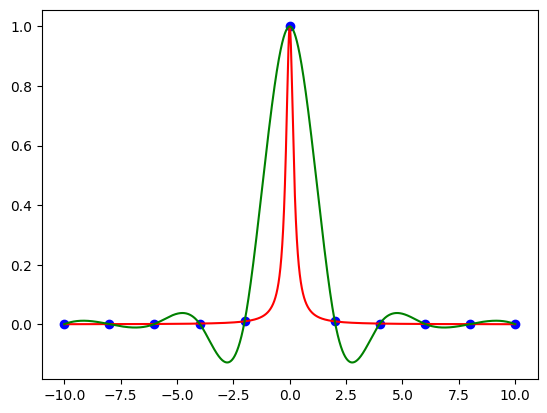

In [65]:
# EXEMPLO ORIGINAL

x1 = np.array([-5, -4, -3, -2, -1.5, -1, -0.5, 0, 0.5, 1, 2, 3, 4, 5])
y1 = R(x1)

# OUTRO EXEMPLO

x2 = np.array([-10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10])
y2 = R(x2)

# PLOTAGEM

#CalculateAndPlot(5, x1, y1, 'linear')
#CalculateAndPlot(10, x2, y2, 'linear')
CalculateAndPlot(10, x2, y2, 'cubic')

## Exercício 3

Mostrar que de fato vale a relação que aparece na Eq. 5.1, i.e.,

$$\nabla \Phi(c)=A^T(Ac-y)$$

## Exercício 4

Considerar o arquivo data.txt disponível no Tidia, o qual disponibiliza dados experimentais. Queremos estudar possíveis relações entre os dados que aparecem nas diversas colunas desse arquivo. Fazer um código de python que carrega o arquivo e aplica o método das equações normais para estabelecer qual é a melhor relação entre os dados (no sentido dos quadradros mínimos), considerando as seguintes possibilidades:

- $c_{(3)} \approx k_1 + k_2 c_{(1)} $
- $c_{(3)} \approx k_1 + k_2 c_{(1)} + k_3 c_{(1)}^{2} $
- $c_{(4)} \approx k_1 + k_2 c_{(1)} + k_3 c_{(2)} $

Fazer gráficos mostrando os resultados. Notar que para mostrar o gráfico do polinômio que aproxima os dados em cada caso será necessário avaliar ele em vários pontos no intervalo de interesse, para isto, pode usar por exemplo a função polyval.

In [26]:
# CARREGAR DADOS DO ARQUIVO

arquivo = open("Docs/data.txt", "r")
data = arquivo.read().split("\n")

# CONSTS
c1 = []
c2 = []
c3 = []
c4 = []

# SPLITING VALUES

for i in range(len(data)-1):

    dataSplit = data[i].split()
    
    c1.append(dataSplit[0])
    c2.append(dataSplit[1])
    c3.append(dataSplit[2])
    c4.append(dataSplit[3])

arquivo.close()


### Caso 1: $c_3 \approx k_1 + k_2c_1$

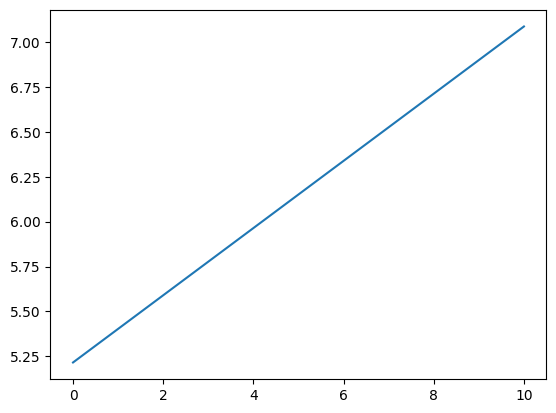

In [60]:
# TESTING VALUES - Montando caso 1: c_3 approx k1 + k2c_1
A = np.zeros(shape=(100,2))
At = np.zeros(shape=(100,2))
A[:, 0] = 1
A[:, 1] = c1

# B = A^t @ A => matriz quadrada 
A_t=np.transpose(A)
B=A_t@A

# A^t Ac = A^t y -> Bc = A^t @ y
y = np.zeros(shape=(100,1))
y[:,0] = c3

# Descobrindo a 'matriz' de coeficientes dos polinômios
c = np.linalg.solve(B,(A_t@y))

# Avaliando em diversos pontos
x_graph = np.linspace(0, 10, 1000)
y_graph = np.polyval(c, x_graph)

plt.plot(x_graph, y_graph)

### Caso 2: $c_3 \approx k_1 + k_2c_1 + k_3c_1²$

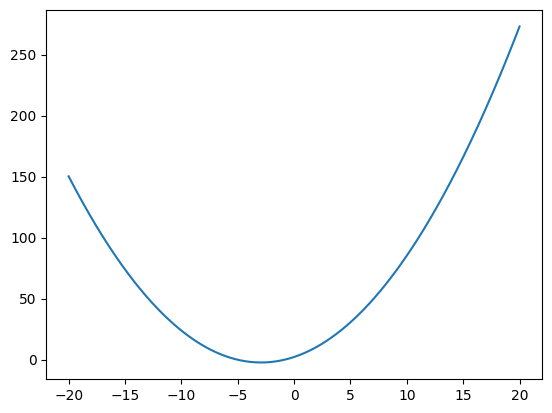

In [67]:
# TESTING VALUES - Montando caso 1: c_3 approx k1 + k2c_1 + k3c_1²

A = np.zeros(shape=(100,3))
At = np.zeros(shape=(100,3))
A[:, 0] = 1
A[:, 1] = c1

for i in range(len(data)-1):
    A[i][2] = (float(c1[i]))**2

# B = A^t @ A => matriz quadrada 
A_t=np.transpose(A)
B=A_t@A

# A^t Ac = A^t y -> Bc = A^t @ y
y = np.zeros(shape=(100,1))
y[:,0] = c3

# Descobrindo a 'matriz' de coeficientes dos polinômios
c = np.linalg.solve(B,(A_t@y))

# Avaliando em diversos pontos
x_graph = np.linspace(-20, 20, 1000)
y_graph = np.polyval(c, x_graph)

plt.plot(x_graph, y_graph)

### Caso 3: $c_4 \approx k_1 + k_2c_1 + k_3c_2$

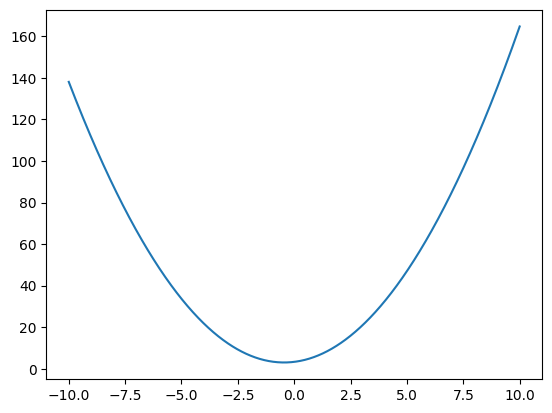

In [64]:
# TESTING VALUES - Montando caso 1: c_4 approx k1 + k2c_1 + k3c_2

A = np.zeros(shape=(100,3))
At = np.zeros(shape=(100,3))
A[:, 0] = 1
A[:, 1] = c1
A[:, 2] = c2

# B = A^t @ A => matriz quadrada 
A_t=np.transpose(A)
B=A_t@A

# A^t Ac = A^t y -> Bc = A^t @ y
y = np.zeros(shape=(100,1))
y[:,0] = c4

# Descobrindo a 'matriz' de coeficientes dos polinômios
c = np.linalg.solve(B,(A_t@y))

# Avaliando em diversos pontos
x_graph = np.linspace(-10, 10, 1000)
y_graph = np.polyval(c, x_graph)

plt.plot(x_graph, y_graph)

## Exercício 5

Considerar a seguinte integral:

$$\int_0^1 \frac{4}{1+x^{2}} \,dx= 4a*\tan(x)\Big|_0^1 = \pi$$

Usando as diferentes regras compostas de Newton-Cotes vistas, calcular o valor numérico da integral e calcular o erro do resultado (i.e., e = |valor exato − valor numérico|). Plotar esse erro como função do número de subintervalos usando a função loglog para plotar em papel logarítmico. Que conclusões pode tirar?

# Exercício 6

Considerar as redes hidráulicas estudadas anteriormente, para o qual foi desenvolvida a função SolveNetwork() e a função que calcula a potência consumida pela bomba. Considerar uma rede com os seguintes parâmetros:
- n = 8
- m = 9
- QB = 3
- natm = n*m - 1
- nB = 0

As condutâncias dependem de um parâmetro:

$$\begin{cases}CH = 2.3 + 10e^{-(x-5)²}\\ CV =1.8 + 10e^{-(x-5)²}\end{cases}$$

Calcular a integral da potencia no intervalo 1 ≤  ≤ 10 usando a regra do ponto médio, do trapezio e de Simpson compostas considerando 2, 4, 6, 8, 10 intervalos. Organizar os resultados numa tabela.